<a href="https://colab.research.google.com/github/KwonYN/TIL/blob/master/PYTHON/TENSORFLOW/Ch3_%EC%98%88%EC%A0%9C_08_Multi_Variable_LR_NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter3-2. Deep Learning 기초 : Linear Regression

>## [예제3-8] Multi Variable Linear Regression (NumPy)

>### Load modules

In [8]:
import numpy as np
import matplotlib.pyplot as plt

print("Module Loaded.")
print("NumPy Version :{}".format(np.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

Module Loaded.
NumPy Version :1.17.4
Matplotlib Version :3.1.1


> ### Input and Label

In [0]:
# Weight, Height, Smoking vs Life-span
x_input = np.array([[60., 167.64, 1.], [65., 152.4, 0.], [55., 182.88, 1.] ]) #, [85, 183.4, 1.]])
labels = np.array([[66], [74], [78] ]) #, [72]])

>### Hypothesis : Linear Equation (Multi-Variable)
>### $X = \begin{bmatrix} x_{11} & x_{12} & x_{13} \\ x_{21} & x_{22} & x_{23} \\ x_{31} & x_{32} & x_{33} \\ x_{41} & x_{42} & x_{43}\end{bmatrix}$,  $W = \begin{bmatrix} w_{1} \\ w_{2} \\w_{3}\end{bmatrix}$
>### $H(x) = XW + b$

In [0]:
# Weight, Bias
W = np.random.normal(size=(3, 1))
b = np.random.normal()

# Hypothesis
def Hypothesis(X: float or np.ndarray)->float:
    return np.matmul(X, W) + b
    # return np.dot(X, W) + b   # 동일한 결과가 나옴!

>### Cost Function : Mean Squared Error (MSE)
>### $cost(W,b) = \sum_{i=1}^{n}(h(x_{i})-y_{i})^{2}$

In [0]:
# Cost function
def Cost(x: float or np.ndarray, t: float or np.ndarray)->float:
    # return np.mean((Hypothesis(x) - t)**2)
    return np.mean(np.square(Hypothesis(x) - t))

>### Gradient
>### $\frac{d}{dx}f(x) = \lim_{\delta \to 0} \frac{f(x+\delta) - f(x-\delta)}{2\delta}$

In [0]:
# Gradient
def Gradient(x: float or np.ndarray, t: float or np.ndarray)->tuple:
    global W, b
    pres_W = W.copy()
    grad_W = np.zeros_like(W)
    delta = 1e-7

    for idx in range(W.size):     # x, 즉 입력하는 값들이 여러 개니까 w 또한 그 개수만큼!! 그래서 for문 돌리면서 기울기 구해주는 것! 각 변수에 대해 편미분!
        W[idx,0] = pres_W[idx,0] + delta
        cost_p = Cost(x, t)
        W[idx,0] = pres_W[idx,0] - delta
        cost_m = Cost(x, t)
        grad_W[idx,0] = (cost_p-cost_m)/(2*delta)
        W[idx,0] = pres_W[idx,0]

    pres_b = b                   # 하지만 bias는 여전히 하나이기 때문에 이전 코드들과 동일!
    b = pres_b + delta
    cost_p = Cost(x, t)
    b = pres_b - delta
    cost_m = Cost(x, t)
    grad_b = (cost_p-cost_m)/(2*delta)

    return grad_W, grad_b

>### 학습 준비 과정

In [24]:
N_training = 1000000
training_idx = np.arange(0, N_training+1, 1)
cost_graph = np.zeros(N_training+1)

cost_graph[0] = Cost(x_input, labels)
print("[{:>5}] cost = {:>10.4}, W = [[{:>7.4}] [{:>7.4}] [{:>7.4}]], b = {:>7.4}".format(0, cost_graph[0], W[0,0], W[1,0], W[2,0], b))

[    0] cost =  2.862e+04, W = [[0.06111] [-0.6009] [ 0.6478]], b =  0.4474


>### Training
>### $\mu$ : Learning rate
>### $W = W - \mu\frac{\partial}{\partial W}cost(W, b)$
>### $b = b - \mu\frac{\partial}{\partial b}cost(W, b)$

In [25]:
# 학습 (Training)
learning_rate = 0.00003
for cnt_training in range(1, N_training+1):
    grad_W, grad_b = Gradient(x_input, labels)
    cost_graph[cnt_training] = Cost(x_input, labels)
    W -= learning_rate * grad_W
    b -= learning_rate * grad_b
    if cnt_training % 1000 == 0:
        print("[{:>5}] cost = {:>10.4}, W = [[{:>7.4}] [{:>7.4}] [{:>7.4}]], b = {:>7.4}".format(cnt_training, cost_graph[cnt_training], W[0,0], W[1,0], W[2,0], b))

[ 1000] cost =      23.53, W = [[ 0.4599] [ 0.2638] [ 0.5788]], b =  0.4533
[ 2000] cost =      23.37, W = [[ 0.4588] [ 0.2645] [ 0.5104]], b =  0.4531
[ 3000] cost =      23.22, W = [[  0.456] [ 0.2658] [ 0.4423]], b =   0.453
[ 4000] cost =      23.06, W = [[ 0.4531] [ 0.2671] [ 0.3744]], b =  0.4529
[ 5000] cost =      22.91, W = [[ 0.4503] [ 0.2684] [ 0.3067]], b =  0.4528
[ 6000] cost =      22.76, W = [[ 0.4475] [ 0.2697] [ 0.2393]], b =  0.4527
[ 7000] cost =      22.61, W = [[ 0.4446] [ 0.2709] [ 0.1721]], b =  0.4525
[ 8000] cost =      22.46, W = [[ 0.4418] [ 0.2722] [ 0.1051]], b =  0.4524
[ 9000] cost =      22.31, W = [[  0.439] [ 0.2735] [0.03834]], b =  0.4523
[10000] cost =      22.16, W = [[ 0.4362] [ 0.2748] [-0.0282]], b =  0.4522
[11000] cost =      22.01, W = [[ 0.4334] [  0.276] [-0.09452]], b =  0.4521
[12000] cost =      21.87, W = [[ 0.4306] [ 0.2773] [-0.1606]], b =  0.4519
[13000] cost =      21.72, W = [[ 0.4279] [ 0.2785] [-0.2265]], b =  0.4518
[14000] cos

KeyboardInterrupt: ignored

>### Hypothesis Test 

In [26]:
yes_or_no = ["No", "Yes"]

print("[ Hypothesis test ]")

H_x = Hypothesis(x_input)
for x,h,l in zip(x_input, H_x, labels):
    print("Weight : {}, Height : {}, Smoking : {} => life-span : {} [label => {}]".format(x[0],x[1],yes_or_no[int(x[2])],h,l[0]))

x_test = [86, 183.4, 1.]
H_x = Hypothesis(x_test)
print("\n[ Hypothesis test by another data ]")
print("Weight : {}, Height : {}, Smoking : {} => life-span : {}".format(x_test[0],x_test[1],yes_or_no[int(x_test[2])],H_x))

[ Hypothesis test ]
Weight : 60.0, Height : 167.64, Smoking : Yes => life-span : [71.93599811] [label => 66]
Weight : 65.0, Height : 152.4, Smoking : No => life-span : [71.03935923] [label => 74]
Weight : 55.0, Height : 182.88, Smoking : Yes => life-span : [75.02551437] [label => 78]

[ Hypothesis test by another data ]
Weight : 86, Height : 183.4, Smoking : Yes => life-span : [85.89051863]


>### Plotting

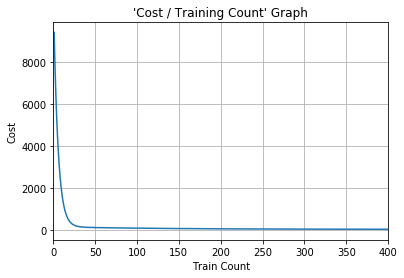

In [15]:
# Training 상황에 대한 그래프 출력
fig_cost, ax_cost = plt.subplots()
ax_cost.plot(training_idx, cost_graph)
ax_cost.set_title("'Cost / Training Count' Graph")
ax_cost.set_xlim(0, 400)
ax_cost.set_xlabel("Train Count")
ax_cost.set_ylabel("Cost")
ax_cost.grid(True)